In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import rslaser
import scipy.optimize as opt

In [2]:
def gaussian(params, amplitude, xo, yo, sigma):
    xo = float(xo)
    yo = float(yo)
    r = np.sqrt((params[0] - xo)**2 + (params[1] - yo)**2)
    g = amplitude * np.exp(-(r/sigma)**2)
    return g.ravel()

In [3]:
image_file_name = 'basler_800nm_seed.bmp'
package_data_dir = rslaser.pkg_resources.resource_filename('rslaser','package_data')
path_to_file = os.path.join(package_data_dir, image_file_name)
image = Image.open(path_to_file)
img_orig = np.array(image)

In [4]:
x = np.linspace(0, img_orig.shape[1] - 1, img_orig.shape[1])
y = np.linspace(0, img_orig.shape[0] - 1, img_orig.shape[0])
x, y = np.meshgrid(x, y)

initial_guess = (3, 300, 300, 10)
popt, pcov = opt.curve_fit(gaussian, (x, y), img_orig.flatten(), p0=initial_guess, maxfev=10000)
img_fit = gaussian((x, y), *popt).reshape(img_orig.shape)

In [5]:
_max = popt[0]
_rx = popt[1]
_ry = popt[2]
_sig = popt[3]
print('_max = ', _max)
print('_sig = ', _sig)

_max =  142.711013089982
_sig =  193.3463237623583


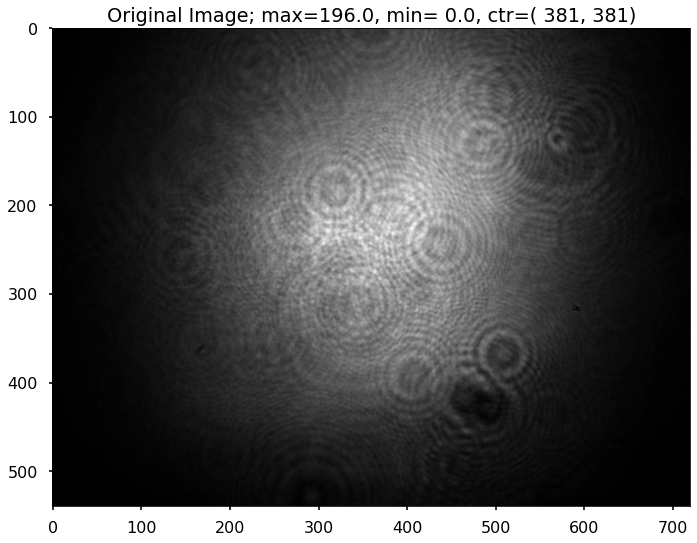

In [6]:
# plot twoD_Gaussian data generated above
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_orig, cmap='gray', vmin=np.min(img_orig), vmax=np.max(img_orig))
    ax.set_title('Original Image; max={0:4.1f}'.format(np.max(img_orig))+', min={0:4.1f}'.format(np.min(img_orig))+', ctr=({0:4.0f},{0:4.0f})'.format(_rx,_ry))

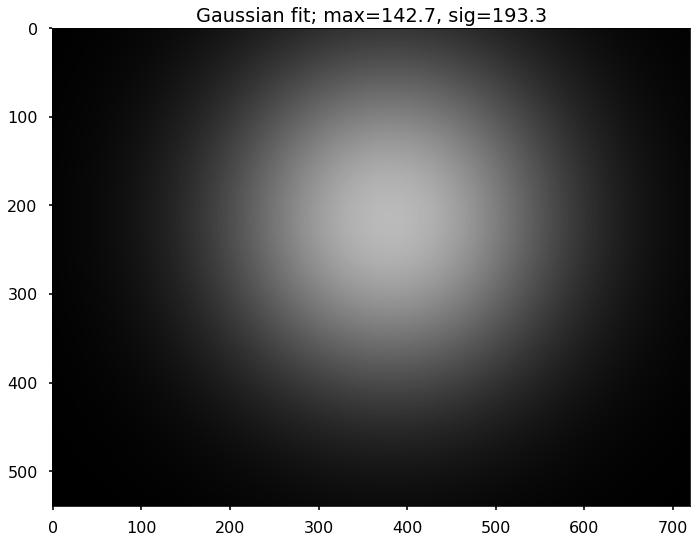

In [7]:
# plot twoD_Gaussian data generated above
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_fit, cmap='gray', vmin=np.min(img_orig), vmax=np.max(img_orig))
    ax.set_title('Gaussian fit; max={0:4.1f}, '.format(_max)+'sig={0:4.1f}'.format(_sig))

min_diff =  -45.6998985061725
max_diff =  65.34043910440523
relative deviation (above) =  33.336958726737365 %
relative deviation (below) =  23.316274748047196 %


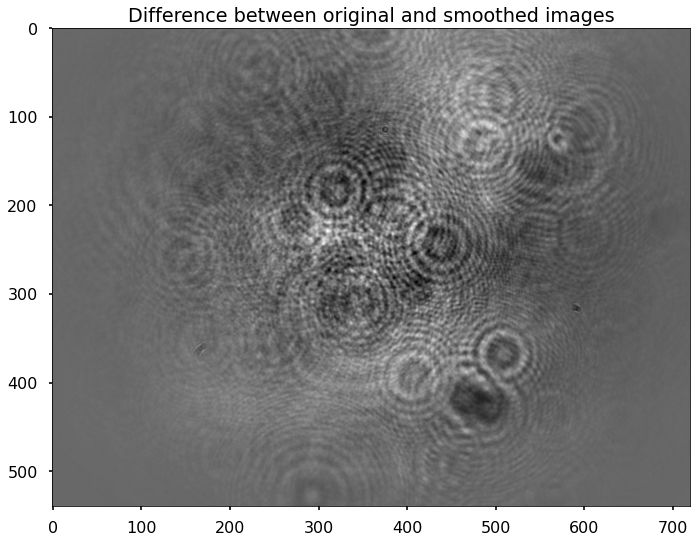

In [8]:
# img_diff = 128 + img_orig - img_fit
img_diff = img_orig - img_fit

print('min_diff = ', np.min(img_diff))
print('max_diff = ', np.max(img_diff))
    
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_diff, cmap='gray', vmin=np.min(img_diff), vmax=np.max(img_diff))
    ax.set_title("Difference between original and smoothed images")

print('relative deviation (above) = ', 100.*(np.max(img_diff)/np.max(img_orig)), '%')
print('relative deviation (below) = ', 100.*(abs(np.min(img_diff))/np.max(img_orig)), '%')

In [9]:
print(' ')
print('*************************')
print('img_orig = ')
print(img_orig)
min_orig = np.min(img_orig)
max_orig = np.max(img_orig)
print(' ')
print('min original = ', min_orig)
print('max original = ', max_orig)

print(' ')
print('*************************')
print('img_fit = ')
print(img_fit)
min_fit = np.min(img_fit)
max_fit = np.max(img_fit)
print(' ')
print('min fitted = ', min_fit)
print('max fitted = ', max_fit)

print(' ')
print('*************************')
print('img_diff = ')
print(img_diff)
min_diff = np.min(img_diff)
max_diff = np.max(img_diff)
print(' ')
print('min diff = ', min_diff)
print('max diff = ', max_diff)

 
*************************
img_orig = 
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 2 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
 
min original =  0
max original =  196
 
*************************
img_fit = 
[[0.84563109 0.86301713 0.88071349 ... 1.99649602 1.96086382 1.92576453]
 [0.85543504 0.87302264 0.89092418 ... 2.0196427  1.98359739 1.94809116]
 [0.86530636 0.88309691 0.90120502 ... 2.04294842 2.00648716 1.97057122]
 ...
 [0.18688153 0.19072378 0.19463461 ... 0.44121867 0.43334407 0.42558725]
 [0.18369413 0.18747085 0.19131498 ... 0.43369337 0.42595308 0.41832856]
 [0.18055143 0.18426354 0.18804191 ... 0.42627361 0.41866575 0.41117167]]
 
min fitted =  0.18055143462594658
max fitted =  142.71096317011455
 
*************************
img_diff = 
[[-0.84563109 -0.86301713 -0.88071349 ... -0.99649602 -0.96086382
  -0.92576453]
 [-0.85543504 -0.87302264 -0.89092418 ... -1.0196427  -0.98359739
  -0.94809116]
 [-0.86530636 -0.88309691 -0.90120502 ... -1.0